# Day 5
7, 100

### Import modules

In [14]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

## Options

In [21]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish-7-100'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam', 'depth':7, 'width':50}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [22]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 5.141s 


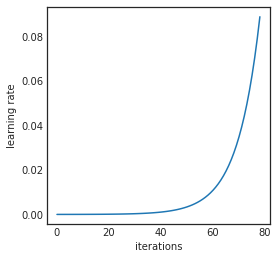

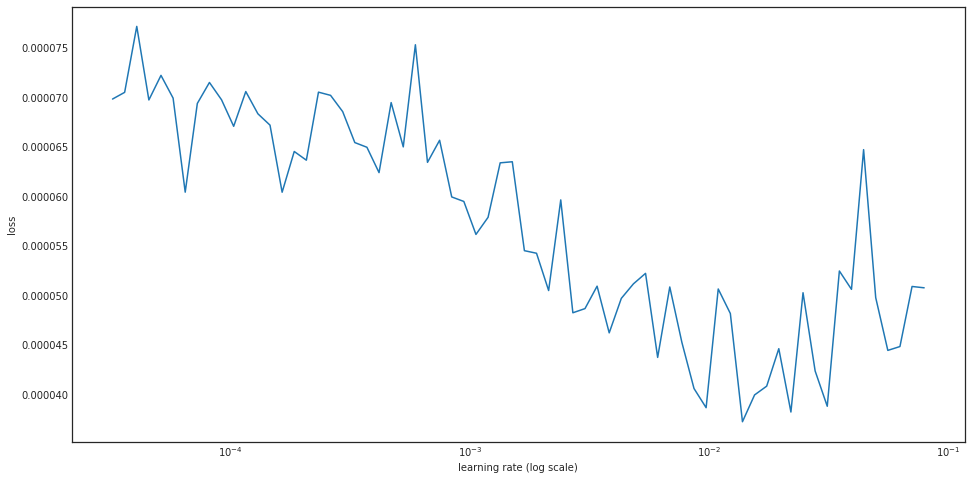

______________________________________



In [24]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [25]:
compileArgs['lr'] = 5e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.90026026286e-05
2 New best found: 3.64956325804e-05
3 New best found: 3.54543244003e-05
5 New best found: 3.49591821861e-05
6 New best found: 3.43826850992e-05
7 New best found: 3.41430344579e-05
12 New best found: 3.38258467696e-05
13 New best found: 3.34889353204e-05
14 New best found: 3.34066312179e-05
15 New best found: 3.34044028362e-05
25 New best found: 3.32746661543e-05
27 New best found: 3.29879968606e-05
28 New best found: 3.29554846548e-05
29 New best found: 3.29362520796e-05
30 New best found: 3.29258239473e-05
31 New best found: 3.29211229614e-05
52 New best found: 3.289924318e-05
54 New best found: 3.28194709491e-05
55 New best found: 3.27622555301e-05
57 New best found: 3.27451009578e-05
90 New best found: 3.2726387679e-05
Early stopping after 190 epochs
Score is: {'loss': 3.2726387679033933e-05, 'AUC': 0.10322470250595406, 'wAUC': 0.066766967549

Early stopping after 161 epochs
Score is: {'loss': 3.1657697681199629e-05, 'AUC': 0.10016850814651179, 'wAUC': 0.062497601361113153}
Fold took 148.150s

Running fold 10 / 10
1 New best found: 3.86423455991e-05
2 New best found: 3.48346183936e-05
3 New best found: 3.42691037451e-05
5 New best found: 3.41893480011e-05
6 New best found: 3.27905788701e-05
7 New best found: 3.26928795242e-05
11 New best found: 3.26136165612e-05
12 New best found: 3.24062447022e-05
13 New best found: 3.22714272076e-05
14 New best found: 3.21133259289e-05
15 New best found: 3.21089137861e-05
23 New best found: 3.20999397781e-05
24 New best found: 3.18496159872e-05
25 New best found: 3.18218122391e-05
27 New best found: 3.16182635523e-05
28 New best found: 3.15953175525e-05
29 New best found: 3.15945512896e-05
30 New best found: 3.15217439081e-05
31 New best found: 3.15183273787e-05
54 New best found: 3.15052013509e-05
55 New best found: 3.14208868497e-05
56 New best found: 3.13993992253e-05
103 New best found

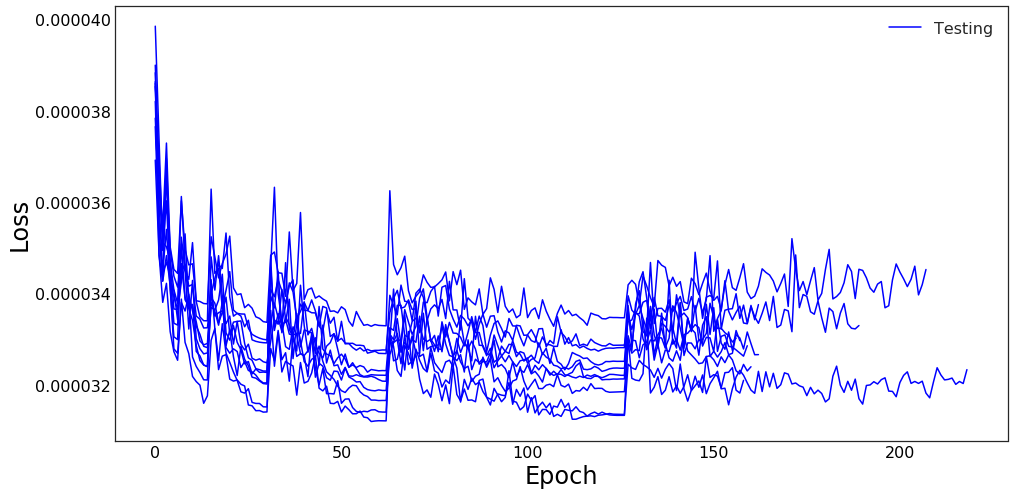

Mean wAUC = 0.0647 +- 0.0007
______________________________________



In [26]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=100, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [27]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [28]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 2 with loss = 3.119907727e-05
Model 1 is 9 with loss = 3.13069018686e-05
Model 2 is 8 with loss = 3.16576976812e-05
Model 3 is 3 with loss = 3.18712371057e-05
Model 4 is 1 with loss = 3.20804762087e-05
Model 5 is 5 with loss = 3.21852991782e-05
Model 6 is 4 with loss = 3.22806073461e-05
Model 7 is 7 with loss = 3.26868152686e-05
Model 8 is 0 with loss = 3.2726387679e-05
Model 9 is 6 with loss = 3.32842895887e-05


## Response on development data

In [29]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000234939951782s per sample

Predicting batch 2 out of 10
Prediction took 0.000173764767381s per sample

Predicting batch 3 out of 10
Prediction took 0.000175420573149s per sample

Predicting batch 4 out of 10
Prediction took 0.000171586096287s per sample

Predicting batch 5 out of 10
Prediction took 0.00023576580286s per sample

Predicting batch 6 out of 10
Prediction took 0.000177870249748s per sample

Predicting batch 7 out of 10
Prediction took 0.000163671445847s per sample

Predicting batch 8 out of 10
Prediction took 0.000198132205328s per sample

Predicting batch 9 out of 10
Prediction took 0.000190836446596s per sample

Predicting batch 10 out of 10
Prediction took 0.00017545622488s per sample



In [30]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.903684303041, weighted 0.939810797271


## Response on val data

In [31]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000183847427368s per sample

Predicting batch 2 out of 10
Prediction took 0.000160505199432s per sample

Predicting batch 3 out of 10
Prediction took 0.000192078399658s per sample

Predicting batch 4 out of 10
Prediction took 0.000170009803772s per sample

Predicting batch 5 out of 10
Prediction took 0.000161246776581s per sample

Predicting batch 6 out of 10
Prediction took 0.000369641399384s per sample

Predicting batch 7 out of 10
Prediction took 0.000165869188309s per sample

Predicting batch 8 out of 10
Prediction took 0.00019177441597s per sample

Predicting batch 9 out of 10
Prediction took 0.000172653007507s per sample

Predicting batch 10 out of 10
Prediction took 0.000283901596069s per sample



In [32]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.901246233133, weighted 0.934826844758


## Evaluation

### Import in dataframe

In [33]:
valframe = convertToDF(valData)

50000 candidates loaded


In [34]:
sigVal = (valframe.gen_target == 1)
bkgVal = (valframe.gen_target == 0)

### MVA distributions

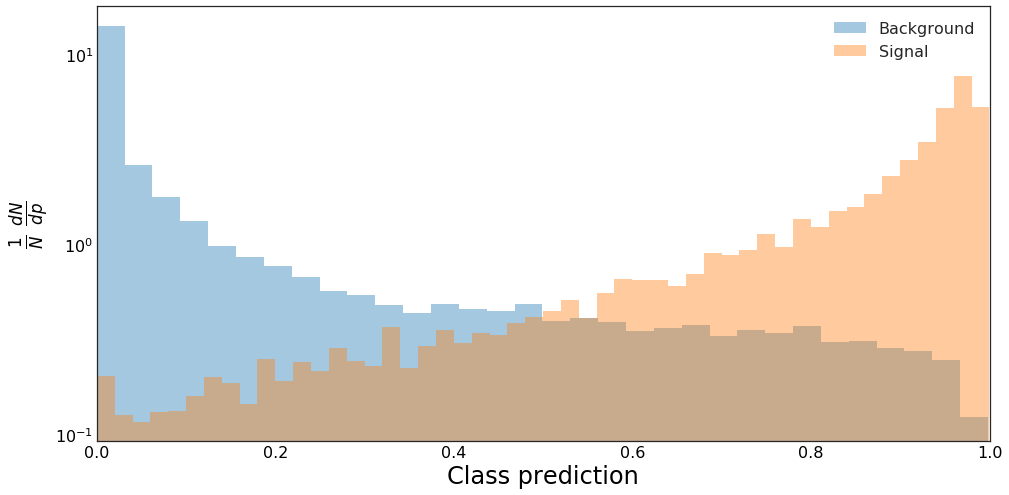

In [35]:
getClassPredPlot([valframe[bkgVal], valframe[sigVal]], weightName='gen_weight')

In [36]:
valframe['ams'] = amsScan(valframe)[0]

[0.93867588043212891, 1.6980430002934612]


In [37]:
bests = foldAMSScan(valframe, 10)

[0.97087699174880981, 2.097435842854429]
Fold 0, best AMS 2.09743584285 at cut of 0.970876991749. Total weights Signal:Bkg. 13.4963550568:8197.77441406


../Modules/Basics.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 1]['gen_weight']),
../Modules/Basics.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 0]['gen_weight']))


[0.96410322189331055, 1.975312158382154]
Fold 1, best AMS 1.97531215838 at cut of 0.964103221893. Total weights Signal:Bkg. 14.2079000473:8246.94921875
[0.93681430816650391, 2.1291018407753564]
Fold 2, best AMS 2.12910184078 at cut of 0.936814308167. Total weights Signal:Bkg. 14.2203235626:8230.23632812
[0.98412889242172241, 1.5988086436386144]
Fold 3, best AMS 1.59880864364 at cut of 0.984128892422. Total weights Signal:Bkg. 13.5213985443:8071.61230469
[0.91079545021057129, 1.734782290343127]
Fold 4, best AMS 1.73478229034 at cut of 0.910795450211. Total weights Signal:Bkg. 14.0902709961:8249.87109375
[0.93740969896316528, 1.7214207060938749]
Fold 5, best AMS 1.72142070609 at cut of 0.937409698963. Total weights Signal:Bkg. 14.1919174194:8156.08886719
[0.96790820360183716, 1.6551780961753018]
Fold 6, best AMS 1.65517809618 at cut of 0.967908203602. Total weights Signal:Bkg. 14.2706899643:8229.76660156
[0.95728075504302979, 1.6994109859195672]
Fold 7, best AMS 1.69941098592 at cut of 0

In [38]:
def scoreTest(ensemble, weights):
    testData = h5py.File(dirLoc + 'testing.hdf5', "r+")
    batchEnsemblePredict(ensemble, weights, testData, ensembleSize=10, verbose=1)

def saveTest(cut, name):
    testData = h5py.File(dirLoc + 'testing.hdf5', "r+")
    
    data = pandas.DataFrame()
    data['EventId'] = getFeature('EventId', testData)
    data['pred_class'] = getFeature('pred', testData)
    
    data['Class'] = 'b'
    data.loc[data.pred_class >= cut, 'Class'] = 's'

    data.sort_values(by=['pred_class'], inplace=True)
    data['RankOrder']=range(1, len(data)+1)
    data.sort_values(by=['EventId'], inplace=True)

    print dirLoc + name + '_test.csv'
    data.to_csv(dirLoc + name + '_test.csv', columns=['EventId', 'RankOrder', 'Class'], index=False)

In [39]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.000168338619579s per sample

Predicting batch 2 out of 10
Prediction took 0.000174917654558s per sample

Predicting batch 3 out of 10
Prediction took 0.000180183271928s per sample

Predicting batch 4 out of 10
Prediction took 0.00017319114425s per sample

Predicting batch 5 out of 10
Prediction took 0.000176280034672s per sample

Predicting batch 6 out of 10
Prediction took 0.000175699073618s per sample

Predicting batch 7 out of 10
Prediction took 0.000172772780332s per sample

Predicting batch 8 out of 10
Prediction took 0.000179928055677s per sample

Predicting batch 9 out of 10
Prediction took 0.00017926325798s per sample

Predicting batch 10 out of 10
Prediction took 0.000174910488996s per sample



In [40]:
def saveTest(cut, name):
    testData = h5py.File(dirLoc + 'testing.hdf5', "r+")
    
    data = pandas.DataFrame()
    data['EventId'] = getFeature('EventId', testData)
    data['pred_class'] = getFeature('pred', testData)
    
    data['Class'] = 'b'
    data.loc[data.pred_class >= cut, 'Class'] = 's'

    data.sort_values(by=['pred_class'], inplace=True)
    data['RankOrder']=range(1, len(data)+1)
    data.sort_values(by=['EventId'], inplace=True)

    print dirLoc + name + '_test.csv'
    data.to_csv(dirLoc + name + '_test.csv', columns=['EventId', 'RankOrder', 'Class'], index=False)

In [42]:
saveTest(0.957172385359, 'Day_5')

../Data/Day_5_test.csv


In [43]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_5_test.csv -m"7-50"

Successfully submitted to Higgs Boson Machine Learning Challenge